<a href="https://colab.research.google.com/github/VitikaJain25/ML_Projects/blob/master/Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Importing required Libraries
2. Loading the dataset
3. Summarizing the dataset
4. Visualizing the dataset
5. Evaluating some algorithms
6. Making Predictions

# 1. Importing Libraries

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# 2. Loading the Dataset

In [4]:
# Loading Dataset
from google.colab import files  #To read file from local
import io
uploaded = files.upload()   # To upload file from local.

iris_data = pd.read_csv(io.BytesIO(uploaded['Iris.csv']))

Saving Iris.csv to Iris (1).csv


# 3. Summarizing the Dataset

In [6]:
# Preview Data
iris_data.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
122,123,7.7,2.8,6.7,2.0,Iris-virginica
120,121,6.9,3.2,5.7,2.3,Iris-virginica
43,44,5.0,3.5,1.6,0.6,Iris-setosa
44,45,5.1,3.8,1.9,0.4,Iris-setosa
37,38,4.9,3.1,1.5,0.1,Iris-setosa


In [7]:
# Description of Dataset
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
# Description of Class
iris_data.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [12]:
# Shape of Data
iris_data.shape

(150, 6)

In [0]:
# Dropping 'Id' column
iris_data.drop('Id', inplace = True, axis = 1)

In [21]:
# shape of data after dropping 'Id' column
iris_data.shape

(150, 5)

In [22]:
# To check for Missing Values
iris_data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# 4. Visualizing the Dataset:
a. Univarite Plots
b. Multivariate Plots

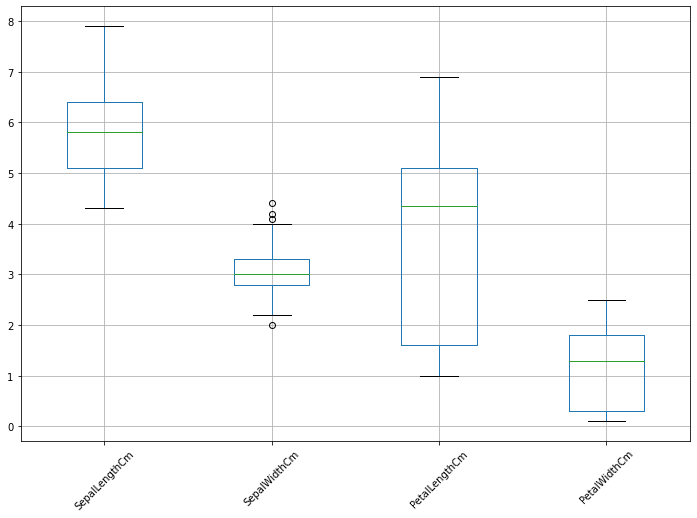

In [35]:
# Box and whisker plot
iris_data.boxplot(figsize = (12,8), rot = 45)
# OR
# iris_data.plot(kind = 'box', subplots = True, layout = (2,2))
# plt.show()



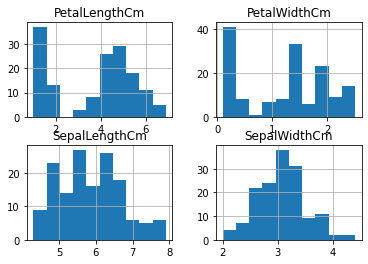

In [31]:
# Histograms
iris_data.hist()
plt.show()

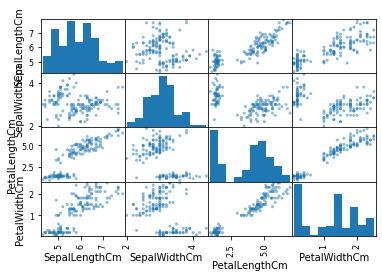

In [40]:
# Multivariate Plots
# Scatter plot matrix

scatter_matrix(iris_data)
plt.show()

# Or for 2 seperate variables
# plt.scatter(iris_data['PetalLengthCm'], iris_data['PetalWidthCm'])
# plt.title('Petal Length and Width')
# plt.xlabel('PetalLengthCm')
# plt.ylabel('PetalWidthCm')
# plt.show()



# 5. Evaluate some Algorithms:
*   Sepearate out a validation dataset
*   Build different models to predict species from flower measurements
*   Select the best model


a. Create a Validation Dataset

In [0]:
# Train and Validate Data
X = iris_data.drop('Species', axis = 1)
Y = iris_data['Species']

In [0]:
validation_size = 0.20
seed = 1
x_train, x_validation, y_train, y_validation = train_test_split(X, Y, test_size = validation_size, random_state = seed)

b. Build Model
We are using 5 different algorithms:

*   Logistic Regression
*   K-Nearest Neighbors
*   Decision Tree
*   Naive Bayes
*   Support Vector Machine



In [46]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver = 'liblinear', multi_class = 'ovr')))
models.append(('K-Nearest Neighbors', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Support Vector Machine', SVC(gamma = 'auto')))

# evaluating each model
names = []
results = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state = 1, shuffle = True)
  cv_results = cross_val_score(model, x_train, y_train, cv = kfold, scoring = 'accuracy')
  results.append(cv_results)
  names.append(name)
  print('%s : %f' %(name, cv_results.mean()))

Logistic Regression : 0.941667
K-Nearest Neighbors : 0.958333
Decision Tree : 0.958333
Naive Bayes : 0.950000
Support Vector Machine : 0.983333
